# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>IBRAHIM FATAI ABIODUN: proffatai@gmail.com</h2>

# Data

In [97]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [98]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [99]:
data.isna().sum()# Analys missing values

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [100]:
data.info()# Describe our data for each feature and use .info() for get information about our dataset


data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


# Exploratory Data Analysis

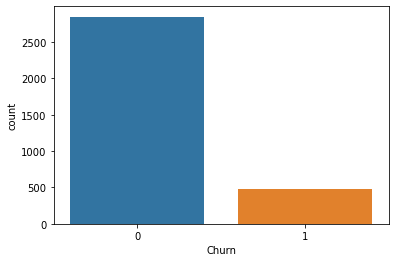

In [101]:
sns.countplot(data["Churn"])# Our label Distribution (countplot)


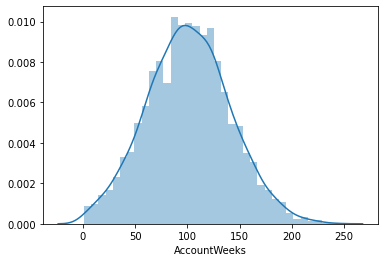

In [102]:
sns.distplot(data["AccountWeeks"])


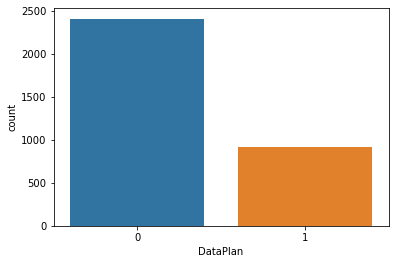

In [122]:
sns.countplot(data["DataPlan"])

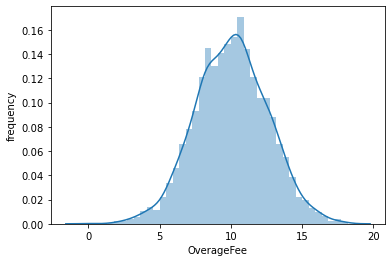

In [124]:
sns.distplot(data["OverageFee"])
plt.ylabel("frequency")
plt.show()

# Preprocessing

- Are there any duplicated values?  No
- Do we need to do feature scaling? Yes
- Do we need to generate new features?No
- Split Train and Test dataset. (0.7/0.3)

In [103]:
data.duplicated().sum()


0

In [104]:
#Dealing with outliers

from scipy import stats
z = np.abs(stats.zscore(data))
z

array([[0.41167182, 0.67648946, 0.32758048, ..., 1.99072703, 0.0715836 ,
        0.08500823],
       [0.41167182, 0.14906505, 0.32758048, ..., 1.56451025, 0.10708191,
        1.24048169],
       [0.41167182, 0.9025285 , 0.32758048, ..., 0.26213309, 1.57434567,
        0.70312091],
       ...,
       [0.41167182, 1.83505538, 0.32758048, ..., 0.01858065, 1.73094204,
        1.3837779 ],
       [0.41167182, 2.08295458, 3.05268496, ..., 0.38390932, 0.81704825,
        1.87621082],
       [0.41167182, 0.67974475, 0.32758048, ..., 2.66049626, 1.28129669,
        1.24048169]])

In [105]:
outliers = list(set(np.where(z > 3)[0]))

len(outliers)

414

In [106]:
new_data = data.drop(outliers).reset_index(drop = False)
new_data.drop('index',axis=1,inplace=True)

In [131]:
X=new_data.iloc[:,1:]
y=new_data.iloc[:,0]
display(X)
display(y)

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
4,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
...,...,...,...,...,...,...,...,...,...,...
2914,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8
2915,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
2916,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
2917,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1


0       0
1       0
2       0
3       0
4       0
       ..
2914    0
2915    0
2916    0
2917    0
2918    0
Name: Churn, Length: 2919, dtype: int64

In [132]:
#scaling

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 0.69196206,  0.        ,  1.63312138, ...,  2.05929645,
        -0.068431  , -0.0941079 ],
       [ 0.1624696 ,  0.        ,  1.63312138, ...,  1.62161451,
        -0.10450144,  1.29308134],
       [ 0.9188874 ,  0.        , -0.61232436, ..., -0.25416527,
        -1.59541298,  0.73070732],
       ...,
       [-0.82087355,  0.        , -0.61232436, ...,  0.0209491 ,
        -0.95015288, -0.2440743 ],
       [-1.82943062,  0.        , -0.61232436, ..., -0.0040613 ,
         1.76314581,  1.44304774],
       [-0.66958999,  0.        ,  1.63312138, ...,  2.74708237,
         1.30625356,  1.29308134]])

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

# Method 1: Logistic Regression

In [139]:
#Splitting data
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=14)

model = LogisticRegression(random_state=0, n_jobs=-1)

cv = cross_validate(model,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)
model_new=cv["estimator"][0]


print(model_new)
print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(model_new.score(X_test,y_test)))


LogisticRegression(n_jobs=-1, random_state=0)
Mean training accuracy: 0.8972099853157122
Test accuracy: 0.906392694063927


In [218]:
print("Bias_for-training ", 1-0.897 )
print("Bias_for_test ", 1-0.906)
print("Variance ",0.10299999999999998-0.09399999999999997)

Bias_for-training  0.10299999999999998
Bias_for_test  0.09399999999999997
Variance  0.009000000000000008


In [ ]:
# from sklearn.metrics import confusion_matrix

y_pred=model_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [141]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

y_pred=model_new.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy: 0.906392694063927
Precision: 0.75
Recall: 0.16304347826086957
F1 Score: 0.26785714285714285


In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       784
           1       0.75      0.16      0.27        92

    accuracy                           0.91       876
   macro avg       0.83      0.58      0.61       876
weighted avg       0.89      0.91      0.88       876



# METHOD 2: DECISION TREE

In [165]:
#Splitting data
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier as DTC

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=100)

model = DTC(max_depth=5, random_state=0)

cv = cross_validate(model,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)
model_new=cv["estimator"][0]


print(model_new)
print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(model_new.score(X_test,y_test)))

DecisionTreeClassifier(max_depth=5, random_state=0)
Mean training accuracy: 0.9446891825746452
Test accuracy: 0.9509132420091324


In [221]:
print("Bias_for-training ", 1-0.9446891825746452 )
print("Bias_for_test ", 1- 0.9509132420091324)
print("Variance ",  0.05531081742535482- 0.04908675799086759 )

Bias_for-training  0.05531081742535482
Bias_for_test  0.04908675799086759
Variance  0.006224059434487228


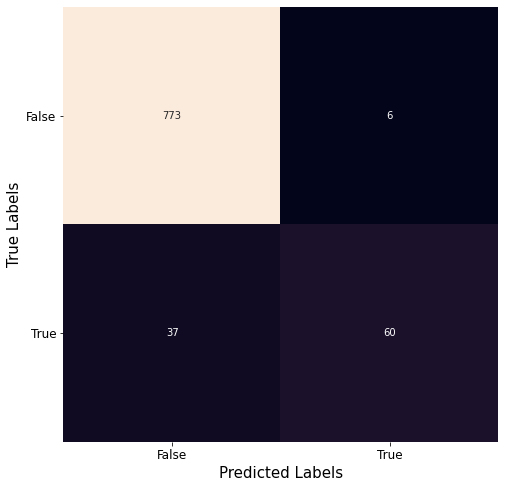

In [166]:
from sklearn.metrics import confusion_matrix

y_pred=model_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [167]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

y_pred=model_new.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy: 0.9509132420091324
Precision: 0.9090909090909091
Recall: 0.6185567010309279
F1 Score: 0.7361963190184049


In [168]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       779
           1       0.91      0.62      0.74        97

    accuracy                           0.95       876
   macro avg       0.93      0.81      0.85       876
weighted avg       0.95      0.95      0.95       876



<H1> METHOD 3 : RANDOMFORESTCLASSIFIER <H1>

In [213]:
#Splitting data
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier as RFC

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=100)

model = RFC(random_state=0)

cv = cross_validate(model,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)
model_new=cv["estimator"][0]


print(model_new)
print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(model_new.score(X_test,y_test)))

RandomForestClassifier(random_state=0)
Mean training accuracy: 0.9539892315222712
Test accuracy: 0.952054794520548


In [224]:
print("Bias_for-training ", 1-0.9539892315222712 )
print("Bias_for_test ", 1-0.952054794520548 )
print("Variance ", 0.047945205479452024 - 0.04601076847772878 )

Bias_for-training  0.04601076847772878
Bias_for_test  0.047945205479452024
Variance  0.0019344370017232437


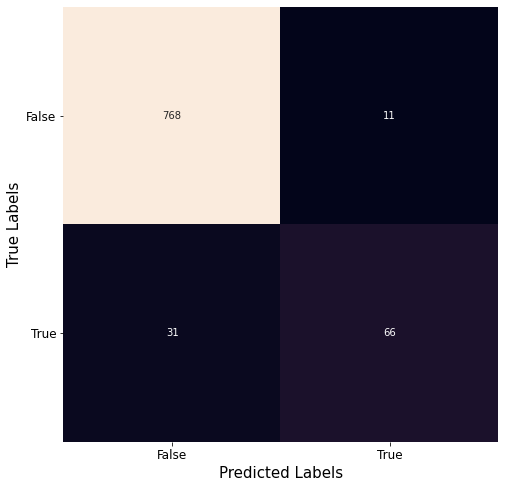

In [214]:
from sklearn.metrics import confusion_matrix

y_pred=model_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [215]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

y_pred=model_new.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy: 0.952054794520548
Precision: 0.8571428571428571
Recall: 0.6804123711340206
F1 Score: 0.7586206896551725


In [216]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       779
           1       0.86      0.68      0.76        97

    accuracy                           0.95       876
   macro avg       0.91      0.83      0.87       876
weighted avg       0.95      0.95      0.95       876



# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

The best peforming model is the Random Forest Classifier because it gives the highest accuracy score and also has least bias and variance on both the test data and train data.
I chose the model because i was hoping to find the optimum classifier model for the problem